# CAB420 Assignment 1A Question 1: Template
Simon Denman (s.denman@qut.edu.au)

## Overview



In [84]:
# set up the environment
import pandas

train = pandas.read_csv('communities_train.csv')
val = pandas.read_csv('communities_val.csv')
test = pandas.read_csv('communities_test.csv')

X_train = train.iloc[:,0:-1] # all columns except the last one 
y_train = train.iloc[:,-1] # the last column
X_val = val.iloc[:,0:-1] # all columns except the last one
y_val = val.iloc[:,-1] # the last column
X_test = test.iloc[:,0:-1] # all columns except the last one
y_test = test.iloc[:,-1] # the last column



(298, 100)
 population              float64
 householdsize           float64
 racepctblack            float64
 racePctWhite            float64
 racePctAsian            float64
                          ...   
 PctSameState85          float64
 LandArea                float64
 PopDens                 float64
 PctUsePubTrans          float64
 LemasPctOfficDrugUn     float64
Length: 100, dtype: object


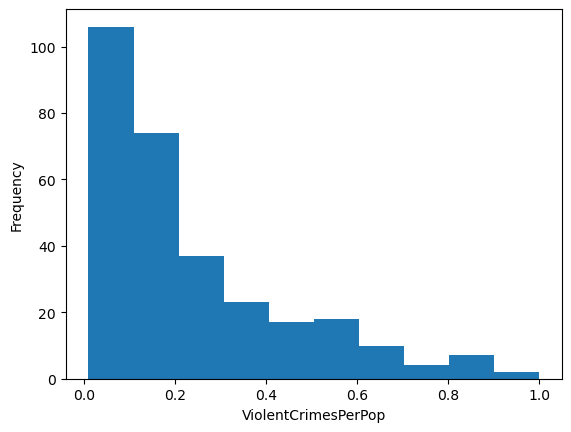

In [85]:
# Explore the data:

# Check the dimensions and data types of the data
print(X_train.shape)
print(X_train.dtypes)

# Look for missing values, outliers, and other data quality issues.
X_train.describe()
y_train.describe()

# Plot histograms, scatterplots, and other visualizations to get an idea of the relationships between the variables.
# Use the training data only.
# For axis labels, use the column names from the data set.
# For the target variable, use the column name "ViolentCrimesPerPop".

# Plot the target variable
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.xlabel('ViolentCrimesPerPop')
plt.ylabel('Frequency')
plt.show()

# # plot the first 10 features
# for i in range(10):
#     plt.hist(X_train.iloc[:,i])
#     plt.xlabel(X_train.columns[i])
#     plt.ylabel('Frequency')
#     plt.show()

# # Plot the first 10 features against the target variable
# for i in range(10):
#     plt.scatter(X_train.iloc[:,i], y_train)
#     plt.xlabel(X_train.columns[i])
#     plt.ylabel('ViolentCrimesPerPop')
#     plt.show()

# # Plot the first 10 features against each other
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j])
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()

# # Plot the first 10 features against each other, with the target variable as the color
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j], c=y_train)
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()

# # Plot the first 10 features against each other, with the target variable as the color
# # and the size of the points proportional to the target variable
# for i in range(10):
#     for j in range(i+1,10):
#         plt.scatter(X_train.iloc[:,i], X_train.iloc[:,j], c=y_train, s=10*y_train)
#         plt.xlabel(X_train.columns[i])
#         plt.ylabel(X_train.columns[j])
#         plt.show()









In [86]:
# print the name of the last coloumn first row in the communities_train.csv
# print(X_train.columns[0])
# print the name of the first row on y train
# print(y_train[0])

# Check if the 'ViolentCrimesPerPop' column exists in the DataFrame
# if 'ViolentCrimesPerPop' in train.columns:
#     # Get the target variable
#     target = train['ViolentCrimesPerPop']

#     # Get the features
#     features = train.drop('ViolentCrimesPerPop', axis=1)
# else:
#     print("Error: 'ViolentCrimesPerPop' column not found in the DataFrame.")



### Linear Regression

0    0.06
1    0.22
2    0.07
3    0.07
4    0.03
Name:  ViolentCrimesPerPop , dtype: float64
Mean squared error: 0.02
Variance score: 0.62


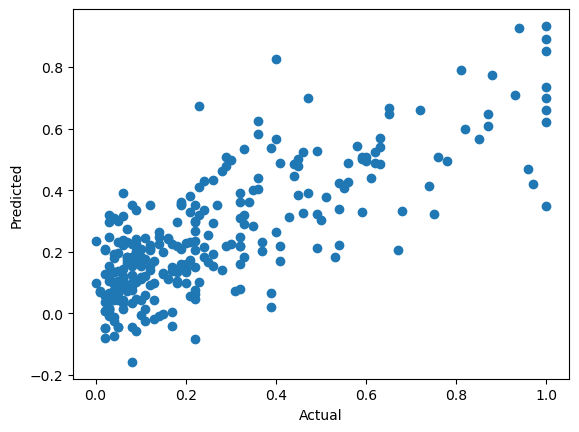

Mean squared error: 0.02
Variance score: 0.55
                              OLS Regression Results                             
Dep. Variable:      ViolentCrimesPerPop    R-squared:                       0.759
Model:                               OLS   Adj. R-squared:                  0.637
Method:                    Least Squares   F-statistic:                     6.207
Date:                   Tue, 04 Apr 2023   Prob (F-statistic):           7.72e-28
Time:                           01:31:48   Log-Likelihood:                 251.07
No. Observations:                    298   AIC:                            -300.1
Df Residuals:                        197   BIC:                             73.27
Df Model:                            100                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

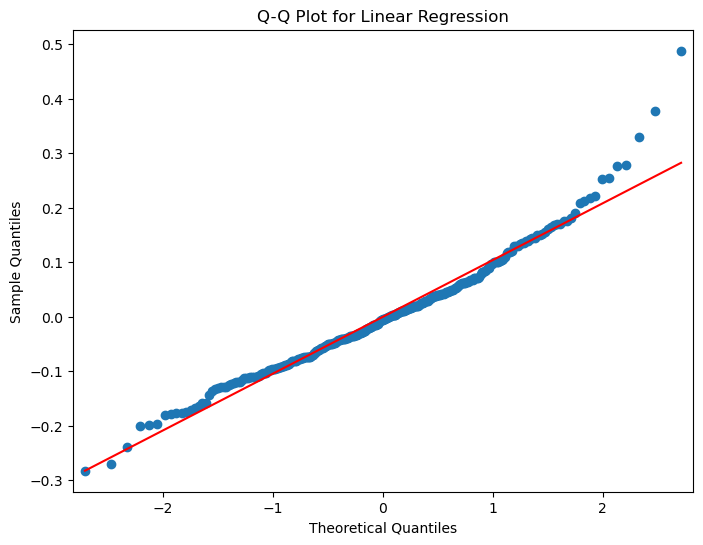

In [87]:
# Prepare the data 
# y_train has the target variable (ViolentCrimesPerPop) from the features.
print(y_train.head())


# Standardize the feature data so that each feature has a mean of 0 and a standard deviation of 1. This can help the models converge faster.
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# print(X_train.shape)


# Standardize the target variable as well.
# scaler = sklearn.preprocessing.StandardScaler()
# scaler.fit(y_train.values.reshape(-1,1))
# y_train = scaler.transform(y_train.values.reshape(-1,1))
# y_val = scaler.transform(y_val.values.reshape(-1,1))
# y_test = scaler.transform(y_test.values.reshape(-1,1))


# Use a library such as scikit-learn to train a linear regression model on the training data.
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X_train, y_train)

# Use the model to predict the target variable for the validation data.
y_val_pred = model.predict(X_val)

# Evaluate the model using the metrics such as mean squared error and R squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# evaluated models on the test set.  
y_test_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# test
import statsmodels.api as sm
import numpy as np
X_val = sm.add_constant(X_val)
X_train = sm.add_constant(X_train)  

# Use OLS to fit a linear regression model to the training data.
model_OLS = sm.OLS(y_train, X_train)
resulting_model = model_OLS.fit()
print(resulting_model.summary())

predicted = resulting_model.predict(X_val)
print('Model 1 RMSE = {}'.format(np.sqrt(mean_squared_error(y_val, resulting_model.predict(X_val)))))
print(resulting_model.params)
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(resulting_model.resid, ax=ax, line='s')
plt.title('Q-Q Plot for Linear Regression')
plt.show()





### Ridge Regression

In [88]:
# Use scikit-learn to train a Ridge regression model on the training data
import sklearn.linear_model as lm
model = lm.Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Use the validation data to find the optimal value of the regularization parameter λ.
model = lm.RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
model.fit(X_train, y_train)
print(model.alpha_)
print(model.coef_)
print(model.intercept_)
print(model.score(X_val, y_val))




100.0
[ 0.00000000e+00  1.82303668e-03 -5.96783276e-03  1.94317870e-02
 -1.32915153e-02  2.10736920e-03 -1.21498708e-02 -3.56565369e-03
  1.41353539e-03  3.38615798e-03  5.04329871e-03  3.12199618e-03
  1.29196080e-02  1.01510570e-03 -3.81409641e-03 -1.88861792e-03
 -1.04279074e-02  3.89264242e-03  6.69571934e-03 -1.03375912e-02
 -6.38871474e-04  2.67853795e-04  4.10634820e-03 -4.07984432e-03
 -5.23672595e-03  1.23295801e-02  3.34265933e-03  9.89223509e-03
  7.48853346e-05 -2.61506537e-03 -1.85109307e-03  2.73632155e-03
 -5.50777746e-05 -8.19844973e-03  9.99559275e-03 -1.14455647e-02
 -2.28947656e-03 -9.77651951e-04 -4.11963440e-03  8.29593545e-04
  1.49870003e-03  3.37496180e-03  1.77853549e-03  5.47997887e-03
 -1.47444179e-02 -1.71975791e-02 -1.53502555e-02 -7.97328803e-03
  5.68230512e-03 -4.75007746e-03  8.69072146e-03  2.06244759e-02
 -6.23501395e-03 -4.95973510e-03 -3.91464511e-03 -3.87335045e-04
  8.97397719e-03 -3.82514047e-03 -2.07941458e-03  1.72224508e-03
  3.21678023e-03  4

100.0
[ 0.00000000e+00  1.82303668e-03 -5.96783276e-03  1.94317870e-02
 -1.32915153e-02  2.10736920e-03 -1.21498708e-02 -3.56565369e-03
  1.41353539e-03  3.38615798e-03  5.04329871e-03  3.12199618e-03
  1.29196080e-02  1.01510570e-03 -3.81409641e-03 -1.88861792e-03
 -1.04279074e-02  3.89264242e-03  6.69571934e-03 -1.03375912e-02
 -6.38871474e-04  2.67853795e-04  4.10634820e-03 -4.07984432e-03
 -5.23672595e-03  1.23295801e-02  3.34265933e-03  9.89223509e-03
  7.48853346e-05 -2.61506537e-03 -1.85109307e-03  2.73632155e-03
 -5.50777746e-05 -8.19844973e-03  9.99559275e-03 -1.14455647e-02
 -2.28947656e-03 -9.77651951e-04 -4.11963440e-03  8.29593545e-04
  1.49870003e-03  3.37496180e-03  1.77853549e-03  5.47997887e-03
 -1.47444179e-02 -1.71975791e-02 -1.53502555e-02 -7.97328803e-03
  5.68230512e-03 -4.75007746e-03  8.69072146e-03  2.06244759e-02
 -6.23501395e-03 -4.95973510e-03 -3.91464511e-03 -3.87335045e-04
  8.97397719e-03 -3.82514047e-03 -2.07941458e-03  1.72224508e-03
  3.21678023e-03  4

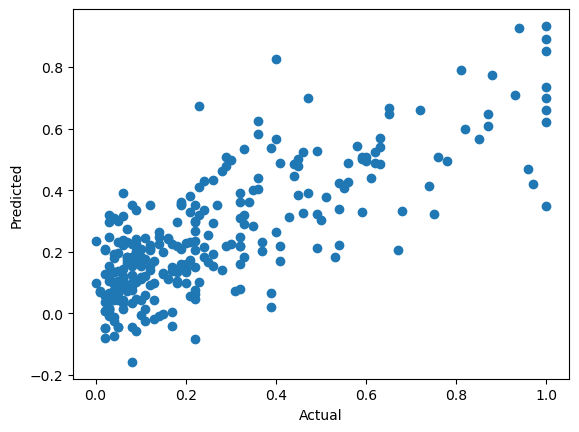

X train  (298, 101)
y train (298,)
X test (299, 100)


ValueError: X has 100 features, but RidgeCV is expecting 101 features as input.

In [89]:
# Train a Ridge regression model:

# Use scikit-learn to train a Ridge regression model on the training data.
import sklearn.linear_model as lm
model = lm.Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Use the validation data to find the optimal value of the regularization parameter λ.
model = lm.RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
model.fit(X_train, y_train)
print(model.alpha_)
print(model.coef_)
print(model.intercept_)
print(model.score(X_val, y_val))

# Evaluate the model using metrics such as mean squared error and R-squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Check the size of X_train and y_train
print("X train " ,X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)


# evaluated models on the test set.
y_test_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

### Lasso Regression

0.01
Mean squared error: 0.02
Variance score: 0.62


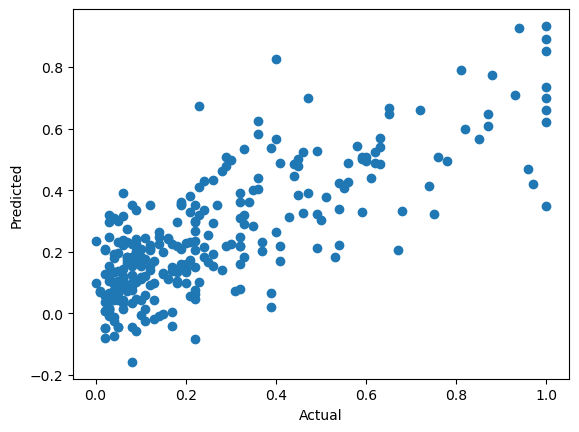

In [ ]:
# Train a Lasso regression model:
# Use scikit-learn to train a LASSO regression model on the training data.
import sklearn.linear_model as lm
model = lm.Lasso(alpha=0.1)
model.fit(X_train, y_train)

# Use the validation data to find the optimal value of the regularization parameter λ.
model = lm.LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
model.fit(X_train, y_train)
print(model.alpha_)

# Evaluate the model using metrics such as mean squared error and R-squared.
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pred))
print('Variance score: %.2f' % r2_score(y_val, y_val_pred))

# make a plot of the predicted values vs the actual values
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# evaluated models on the test set.
y_test_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print('Variance score: %.2f' % r2_score(y_test, y_test_pred))

# Refine the model as necessary based on the validation results.
